# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Muat dataset
df = pd.read_csv('../data/weather.csv', parse_dates=['local_datetime', 'fetch_time'])

# Tampilkan 5 baris pertama
df.head()

,provinsi,kotkab,kecamatan,desa,lon,lat,datetime,local_datetime,temperature,humidity,wind_speed,wind_direction,wind_degree,cloud_cover,precipitation,weather,weather_description,visibility,fetch_time,unique_key
0,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 03:00:00+00:00,2025-06-12 10:00:00,31,66,5.4,E,91,45,0.0,1,Cerah,29600,2025-06-12 03:50:55.156094,20250612100000
1,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 04:00:00+00:00,2025-06-12 11:00:00,32,63,8.5,NE,71,9,0.0,0,Cerah,19995,2025-06-12 03:56:08.978520,20250612110000
2,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 05:00:00+00:00,2025-06-12 12:00:00,32,62,8.5,NE,71,12,0.0,1,Cerah,19995,2025-06-12 04:49:59.213035,20250612120000
3,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 06:00:00+00:00,2025-06-12 13:00:00,32,62,8.5,NE,71,52,0.5,1,Cerah,19995,2025-06-12 03:50:55.156094,20250612130000
4,Banten,Kota Tangerang,Karawaci,Karawaci Baru,106.613203,-6.202708,2025-06-12 07:00:00+00:00,2025-06-12 14:00:00,31,68,6.3,NE,59,62,0.5,2,Cerah Berawan,7207,2025-06-12 03:56:08.978520,20250612140000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 1. Info dasar dataset
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   provinsi             247 non-null    object        
 1   kotkab               247 non-null    object        
 2   kecamatan            247 non-null    object        
 3   desa                 247 non-null    object        
 4   lon                  247 non-null    float64       
 5   lat                  247 non-null    float64       
 6   datetime             247 non-null    object        
 7   local_datetime       247 non-null    datetime64[ns]
 8   temperature          247 non-null    int64         
 9   humidity             247 non-null    int64         
 10  wind_speed           247 non-null    float64       
 11  wind_direction       247 non-null    object        
 12  wind_degree          247 non-null    int64         
 13  cloud_cover          

In [4]:
# 2. Cek missing values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
provinsi               0
kotkab                 0
kecamatan              0
desa                   0
lon                    0
lat                    0
datetime               0
local_datetime         0
temperature            0
humidity               0
wind_speed             0
wind_direction         0
wind_degree            0
cloud_cover            0
precipitation          0
weather                0
weather_description    0
visibility             0
fetch_time             0
unique_key             0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

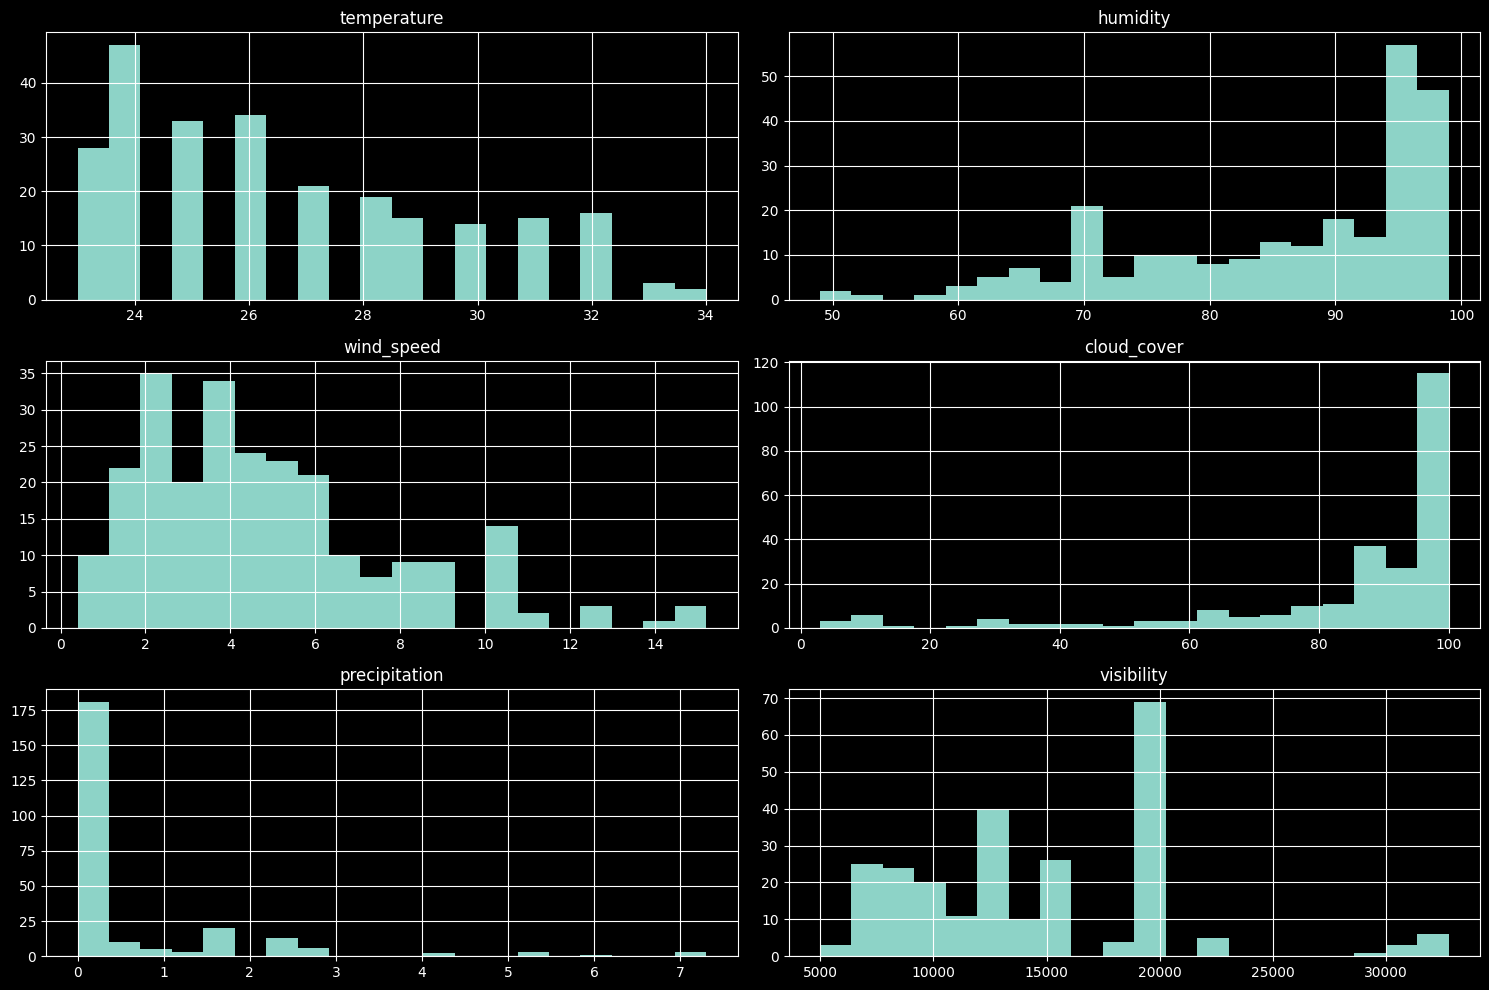

In [5]:
# 3. Analisis distribusi
plt.figure(figsize=(15, 10))
numerical_features = ['temperature', 'humidity', 'wind_speed', 'cloud_cover', 'precipitation', 'visibility']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

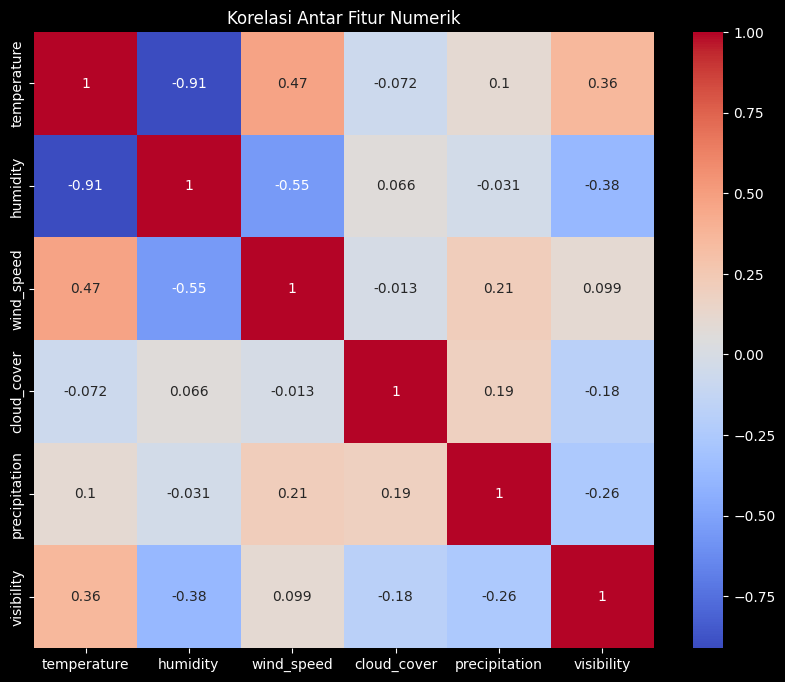

In [6]:
# 4. Korelasi antar fitur numerik
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

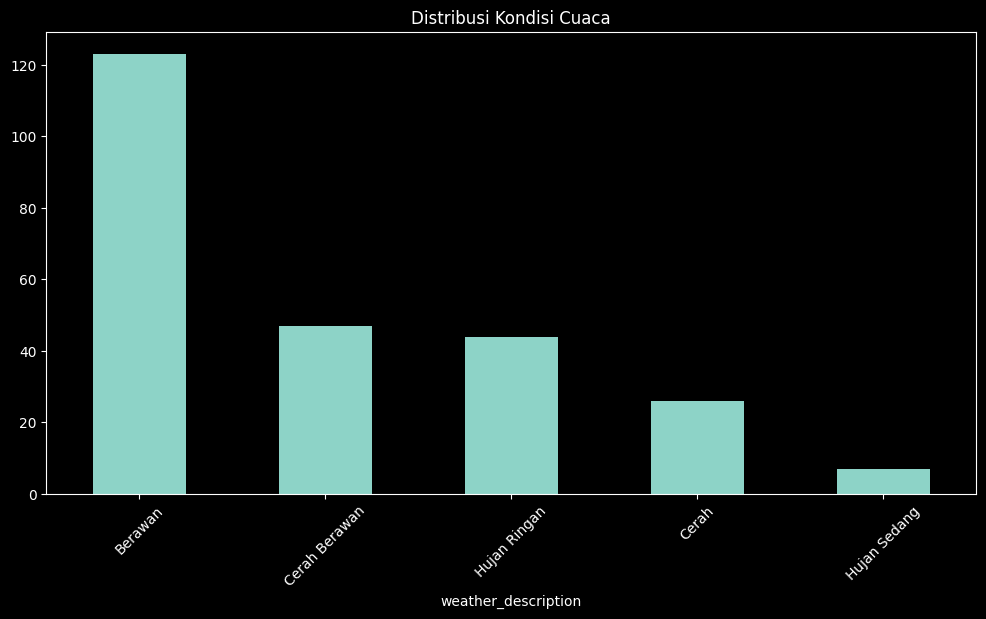

In [7]:
# 5. Analisis kondisi cuaca
weather_counts = df['weather_description'].value_counts()
plt.figure(figsize=(12, 6))
weather_counts.plot(kind='bar')
plt.title('Distribusi Kondisi Cuaca')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# 1. Penanganan data duplikat
df = df.drop_duplicates(subset=['unique_key'], keep='last')

In [9]:
# 2. Ekstrak fitur waktu
df['hour'] = df['local_datetime'].dt.hour
df['day_of_week'] = df['local_datetime'].dt.dayofweek
df['month'] = df['local_datetime'].dt.month

In [10]:
# 3. Pemilihan fitur
features = ['hour','day_of_week', 'month', 'temperature', 'humidity', 
            'wind_speed', 'cloud_cover', 'precipitation', 'weather_description']

df = df[features]
df.head(50)

,hour,day_of_week,month,temperature,humidity,wind_speed,cloud_cover,precipitation,weather_description
0,10,3,6,31,66,5.4,45,0.0,Cerah
1,11,3,6,32,63,8.5,9,0.0,Cerah
2,12,3,6,32,62,8.5,12,0.0,Cerah
3,13,3,6,32,62,8.5,52,0.5,Cerah
4,14,3,6,31,68,6.3,62,0.5,Cerah Berawan
5,15,3,6,30,69,6.3,94,0.5,Berawan
6,16,3,6,29,73,6.3,63,0.6,Cerah Berawan
7,17,3,6,28,84,2.5,92,0.6,Berawan
8,18,3,6,27,89,2.5,83,0.6,Cerah Berawan
9,19,3,6,26,90,2.5,100,0.0,Berawan


In [11]:
# 4. Transformasi fitur kategorikal dan numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['hour','day_of_week', 'month', 'temperature', 
                                   'humidity', 'wind_speed', 'cloud_cover', 'precipitation']),
        ('cat', OneHotEncoder(), ['weather_description'])
    ])

In [12]:
# 5. Buat pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['hour', 'day_of_week',
                                                   'month', 'temperature',
                                                   'humidity', 'wind_speed',
                                                   'cloud_cover',
                                                   'precipitation']),
                                                 ('cat', OneHotEncoder(),
                                                  ['weather_description'])]))])

In [13]:
# 6. Transformasi data
preprocessed_data = pipeline.fit_transform(df)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
clean_feature_names = [
    re.sub(r'^(num|cat)__', '', name)  # Hapus prefix num__ atau cat__
    for name in feature_names
]
clean_feature_names

['hour',
 'day_of_week',
 'month',
 'temperature',
 'humidity',
 'wind_speed',
 'cloud_cover',
 'precipitation',
 'weather_description_Berawan',
 'weather_description_Cerah',
 'weather_description_Cerah Berawan',
 'weather_description_Hujan Ringan',
 'weather_description_Hujan Sedang']

In [14]:
# 7. Simpan dataframe yang sudah dipreprocess
preprocessed_df = pd.DataFrame(preprocessed_data, columns=clean_feature_names)
preprocessed_df.to_csv("weather_preprocessed.csv", index=False)
preprocessed_df.tail()

,hour,day_of_week,month,temperature,humidity,wind_speed,cloud_cover,precipitation,weather_description_Berawan,weather_description_Cerah,weather_description_Cerah Berawan,weather_description_Hujan Ringan,weather_description_Hujan Sedang
242,-1.407356,-1.725832,0.0,-1.260376,0.826564,0.752617,0.204197,-0.469796,0.0,0.0,1.0,0.0,0.0
243,-1.263831,-1.725832,0.0,-1.260376,0.826564,0.752617,0.204197,-0.469796,1.0,0.0,0.0,0.0,0.0
244,-1.120306,-1.725832,0.0,-1.260376,0.826564,0.752617,0.204197,-0.469796,1.0,0.0,0.0,0.0,0.0
245,-0.976782,-1.725832,0.0,-0.913702,0.742547,0.386023,0.204197,-0.469796,1.0,0.0,0.0,0.0,0.0
246,-0.833257,-1.725832,0.0,-0.913702,0.574513,0.386023,0.204197,-0.469796,1.0,0.0,0.0,0.0,0.0
